# LSTM Autoencoder for anomaly detection

In [1]:
import pandas as pd
from pandas.plotting import lag_plot
import datetime as dt
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, RepeatVector
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam,RMSprop
from keras.layers import LSTM, TimeDistributed
import math
import tensorflow as tf

print ('ok')

ok


In [2]:
dataset= pd.read_csv('sahel_jun_aug_2020_DBscan-Lip-cities.csv', index_col='date')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2134 entries, 2020-06-01 02:00:00 to 2020-08-31 01:00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   pos            2134 non-null   int64
 1   neg            2134 non-null   int64
 2   DBSCAN_labels  2134 non-null   int64
dtypes: int64(3)
memory usage: 66.7+ KB


In [4]:
dataset.head()

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0


In [5]:
dataset

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
...,...,...,...
2020-08-30 21:00:00,21,5,5
2020-08-30 22:00:00,10,3,3
2020-08-30 23:00:00,12,0,2


In [6]:
dataset.head(50)

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
2020-06-01 07:00:00,14,3,3
2020-06-01 08:00:00,17,3,3
2020-06-01 09:00:00,27,6,4
2020-06-01 10:00:00,16,5,5


#### Dataset Splitting

In [7]:
train_size = int(len(dataset) * 0.80)
print("Train set size:",train_size)
test_size = len(dataset) - train_size
print("Test set size:",test_size)

train, test = dataset.iloc[:train_size,:], dataset.iloc[train_size:len(dataset), :]
print ("Train dataset:",train.shape)
print ("Test dataset:",test.shape)

Train set size: 1707
Test set size: 427
Train dataset: (1707, 3)
Test dataset: (427, 3)


In [8]:
train

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
...,...,...,...
2020-08-12 16:00:00,11,2,7
2020-08-12 17:00:00,8,2,7
2020-08-12 18:00:00,15,2,7


#### Selection of no-anomalies in Training Set

In [9]:
train = train[train.DBSCAN_labels != -1]

In [10]:
pd.set_option('display.max_rows', None)

In [11]:
train

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
2020-06-01 07:00:00,14,3,3
2020-06-01 08:00:00,17,3,3
2020-06-01 09:00:00,27,6,4
2020-06-01 10:00:00,16,5,5


In [12]:
test

,pos,neg,DBSCAN_labels
date,,,
2020-08-12 21:00:00,11,4,1
2020-08-12 22:00:00,24,4,1
2020-08-12 23:00:00,24,8,8
2020-08-13 00:00:00,13,3,3
2020-08-13 01:00:00,10,3,3
2020-08-13 02:00:00,8,1,0
2020-08-13 03:00:00,3,0,2
2020-08-13 04:00:00,0,2,7
2020-08-13 06:00:00,0,1,0


##### Standardize Data

In [13]:
#standardScaler
scaler = StandardScaler()
scaler = scaler.fit(train[['neg']])
train['neg'] = scaler.transform(train[['neg']])
test['neg'] = scaler.transform(test[['neg']])

<ipython-input-13-148d0425f8d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['neg'] = scaler.transform(train[['neg']])
<ipython-input-13-148d0425f8d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['neg'] = scaler.transform(test[['neg']])


In [14]:
#create sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)


look_back = 12
X_train, y_train = create_dataset(train[['neg']], train['neg'],look_back)
X_test, y_test = create_dataset(test[['neg']], test['neg'],look_back)
print (X_train[0])
print (y_train[0])

[[-0.84988754]
 [ 0.26235943]
 [-1.22063654]
 [-0.84988754]
 [-0.84988754]
 [-0.10838956]
 [-0.10838956]
 [ 1.00385742]
 [ 0.63310843]
 [-0.10838956]
 [-1.22063654]
 [ 1.00385742]]
2.486853387809671


In [15]:
print (X_train[1])
print (y_train[1])

[[ 0.26235943]
 [-1.22063654]
 [-0.84988754]
 [-0.84988754]
 [-0.10838956]
 [-0.10838956]
 [ 1.00385742]
 [ 0.63310843]
 [-0.10838956]
 [-1.22063654]
 [ 1.00385742]
 [ 2.48685339]]
-0.10838955833915698


In [16]:
print (X_train[2])
print (y_train[2])

[[-1.22063654]
 [-0.84988754]
 [-0.84988754]
 [-0.10838956]
 [-0.10838956]
 [ 1.00385742]
 [ 0.63310843]
 [-0.10838956]
 [-1.22063654]
 [ 1.00385742]
 [ 2.48685339]
 [-0.10838956]]
-0.4791385506461324


In [17]:
print (X_train[11])
print (y_train[11])

[[ 1.00385742]
 [ 2.48685339]
 [-0.10838956]
 [-0.47913855]
 [ 0.26235943]
 [-0.47913855]
 [ 0.26235943]
 [ 1.7453554 ]
 [ 0.63310843]
 [ 0.26235943]
 [ 1.00385742]
 [ 3.59910036]]
2.8576023801166466


### Instantiate the model and compile it
###### using Adam as optimizer and mean absolute error for calculating loss function

In [18]:
from keras.regularizers import l2

In [19]:
#Python
early_stop = EarlyStopping(monitor='loss',patience=10)
model = Sequential()
model.add(LSTM(units=256, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation= 'relu', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
model.add(LSTM(128, activation= 'relu', return_sequences=False))
model.add(Dropout(rate=0.3))#azzeriamo il 30% di neuroni per evitare l'overfitting
model.add(RepeatVector(n=X_train.shape[1]))
model.add(LSTM(units=128, activation= 'relu', return_sequences=True))
model.add(LSTM(256, activation= 'relu', return_sequences=True))
model.add(Dropout(rate=0.3))#azzeriamo il 30% di neuroni per evitare l'overfitting
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()
history = model.fit(X_train,y_train, validation_split=0.2, epochs=200, callbacks=[early_stop], batch_size=32)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 256)           264192    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 12, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 12, 256)           394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 256)           0

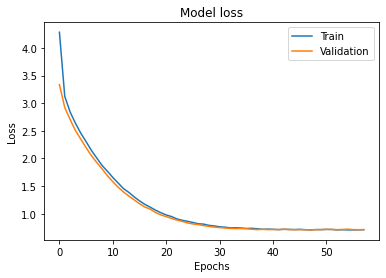

In [20]:
# summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('training.png')
plt.show()

In [21]:
train_pred = model.predict(X_train)
train_pred

array([[[ 7.9899989e-03],
        [ 3.0475855e-04],
        [-6.6783652e-03],
        ...,
        [-4.2271521e-02],
        [-4.4769213e-02],
        [-4.6824470e-02]],

       [[ 4.6147004e-01],
        [ 5.2846366e-01],
        [ 5.2649027e-01],
        ...,
        [ 4.8502535e-01],
        [ 4.8241496e-01],
        [ 4.8035491e-01]],

       [[ 2.1232685e-01],
        [ 2.7513820e-01],
        [ 2.9448485e-01],
        ...,
        [ 2.9277021e-01],
        [ 2.9190168e-01],
        [ 2.9120144e-01]],

       ...,

       [[-1.7372903e-01],
        [-1.6927156e-01],
        [-1.6026381e-01],
        ...,
        [-1.3389534e-01],
        [-1.3324472e-01],
        [-1.3281083e-01]],

       [[-1.9775847e-01],
        [-1.9472370e-01],
        [-1.8333715e-01],
        ...,
        [-1.4654925e-01],
        [-1.4564753e-01],
        [-1.4504887e-01]],

       [[-1.7400911e-01],
        [-1.7065442e-01],
        [-1.6219625e-01],
        ...,
        [-1.3447583e-01],
        [-1.337

In [22]:
train_pred[0]

array([[ 0.00799   ],
       [ 0.00030476],
       [-0.00667837],
       [-0.01391067],
       [-0.02059115],
       [-0.02642572],
       [-0.03143067],
       [-0.03569253],
       [-0.03927244],
       [-0.04227152],
       [-0.04476921],
       [-0.04682447]], dtype=float32)

In [23]:
train_pred_inv = scaler.inverse_transform(train_pred)


In [24]:
train_pred_inv.shape

(1688, 12, 1)

In [25]:
train_pred_inv[0]

array([[3.3139038],
       [3.293175 ],
       [3.2743397],
       [3.2548325],
       [3.2368135],
       [3.2210763],
       [3.2075768],
       [3.1960816],
       [3.1864257],
       [3.1783364],
       [3.1715996],
       [3.166056 ]], dtype=float32)

In [26]:
train_pred_inv[1]

array([[4.53705  ],
       [4.7177477],
       [4.712425 ],
       [4.6925864],
       [4.670032 ],
       [4.650508 ],
       [4.634016 ],
       [4.620455 ],
       [4.609435 ],
       [4.600584 ],
       [4.593543 ],
       [4.587987 ]], dtype=float32)

In [27]:
test_predict = model.predict(X_test)

In [28]:
test_predict.shape

(415, 12, 1)

In [29]:
test_predict[5]

array([[-0.05348893],
       [-0.0695602 ],
       [-0.07804032],
       [-0.08344904],
       [-0.08703964],
       [-0.08951212],
       [-0.09117657],
       [-0.09236491],
       [-0.09322906],
       [-0.09385826],
       [-0.09433286],
       [-0.09469937]], dtype=float32)

In [30]:
test_predict_inv = scaler.inverse_transform(test_predict)

In [31]:
test_predict_inv.shape

(415, 12, 1)

In [32]:
test_predict_inv

array([[[3.28789  ],
        [3.2301686],
        [3.187517 ],
        ...,
        [3.1011372],
        [3.0980198],
        [3.0956426]],

       [[3.3875787],
        [3.367576 ],
        [3.338614 ],
        ...,
        [3.2262623],
        [3.218221 ],
        [3.211563 ]],

       [[3.2000482],
        [3.1496727],
        [3.1223507],
        ...,
        [3.0690978],
        [3.0671897],
        [3.0657418]],

       ...,

       [[3.3772604],
        [3.3878558],
        [3.398291 ],
        ...,
        [3.3625958],
        [3.3557482],
        [3.3496656]],

       [[2.1450129],
        [1.9811612],
        [1.9922827],
        ...,
        [2.0941243],
        [2.096057 ],
        [2.096965 ]],

       [[2.155183 ],
        [1.9811538],
        [1.9841717],
        ...,
        [2.0724964],
        [2.0745604],
        [2.0756106]]], dtype=float32)

In [33]:
y_test.shape

(415,)

In [34]:
y_test

array([ 0.26235943, -1.22063654,  0.26235943,  0.26235943, -0.10838956,
        0.26235943, -0.84988754, -0.10838956, -0.47913855, -0.10838956,
        1.00385742, -0.10838956, -0.47913855,  1.00385742,  1.00385742,
       -0.47913855, -0.47913855, -0.47913855, -1.22063654, -1.22063654,
       -0.84988754, -1.22063654, -0.47913855, -1.22063654,  0.26235943,
       -0.47913855, -0.47913855, -0.47913855, -0.10838956,  0.26235943,
       -0.10838956, -1.22063654, -0.10838956, -0.84988754,  3.59910036,
       11.3848292 ,  5.82359432,  4.34059835,  0.63310843,  0.26235943,
       -0.84988754, -0.84988754, -0.84988754, -0.84988754, -0.84988754,
       -0.10838956, -0.84988754, -0.84988754,  1.00385742,  3.22835137,
        2.48685339,  1.00385742,  1.7453554 ,  1.00385742, -0.84988754,
       -1.22063654,  2.1161044 ,  1.37460641,  0.63310843,  2.1161044 ,
        1.37460641,  1.00385742,  0.63310843, -1.22063654, -1.22063654,
       -0.84988754, -1.22063654, -0.47913855, -0.84988754, -0.84

In [35]:
X_test.shape

(415, 12, 1)

In [36]:
X_test

array([[[ 0.26235943],
        [ 0.26235943],
        [ 1.7453554 ],
        ...,
        [-0.84988754],
        [-0.84988754],
        [ 1.37460641]],

       [[ 0.26235943],
        [ 1.7453554 ],
        [-0.10838956],
        ...,
        [-0.84988754],
        [ 1.37460641],
        [ 0.26235943]],

       [[ 1.7453554 ],
        [-0.10838956],
        [-0.10838956],
        ...,
        [ 1.37460641],
        [ 0.26235943],
        [-1.22063654]],

       ...,

       [[-0.47913855],
        [ 1.7453554 ],
        [ 0.26235943],
        ...,
        [-1.22063654],
        [ 0.63310843],
        [-0.10838956]],

       [[ 1.7453554 ],
        [ 0.26235943],
        [-0.84988754],
        ...,
        [ 0.63310843],
        [-0.10838956],
        [-1.22063654]],

       [[ 0.26235943],
        [-0.84988754],
        [ 0.26235943],
        ...,
        [-0.10838956],
        [-1.22063654],
        [-0.10838956]]])

In [37]:
X_test_inv = scaler.inverse_transform(X_test)

In [38]:
X_test_inv.shape

(415, 12, 1)

In [39]:
X_test_inv 

array([[[ 4.0000000e+00],
        [ 4.0000000e+00],
        [ 8.0000000e+00],
        ...,
        [ 1.0000000e+00],
        [ 1.0000000e+00],
        [ 7.0000000e+00]],

       [[ 4.0000000e+00],
        [ 8.0000000e+00],
        [ 3.0000000e+00],
        ...,
        [ 1.0000000e+00],
        [ 7.0000000e+00],
        [ 4.0000000e+00]],

       [[ 8.0000000e+00],
        [ 3.0000000e+00],
        [ 3.0000000e+00],
        ...,
        [ 7.0000000e+00],
        [ 4.0000000e+00],
        [-4.4408921e-16]],

       ...,

       [[ 2.0000000e+00],
        [ 8.0000000e+00],
        [ 4.0000000e+00],
        ...,
        [-4.4408921e-16],
        [ 5.0000000e+00],
        [ 3.0000000e+00]],

       [[ 8.0000000e+00],
        [ 4.0000000e+00],
        [ 1.0000000e+00],
        ...,
        [ 5.0000000e+00],
        [ 3.0000000e+00],
        [-4.4408921e-16]],

       [[ 4.0000000e+00],
        [ 1.0000000e+00],
        [ 4.0000000e+00],
        ...,
        [ 3.0000000e+00],
        [-4.440

In [40]:
X_test_inv_reshape = X_test_inv.reshape((X_test_inv.shape[0] * X_test_inv.shape[1]), X_test_inv.shape[2])

In [41]:
test_predict_inv_reshape = test_predict_inv.reshape((test_predict_inv.shape[0] * test_predict_inv.shape[1]), test_predict_inv.shape[2])

Training_loss: 0.7950252129165744



/Users/robertamaisano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


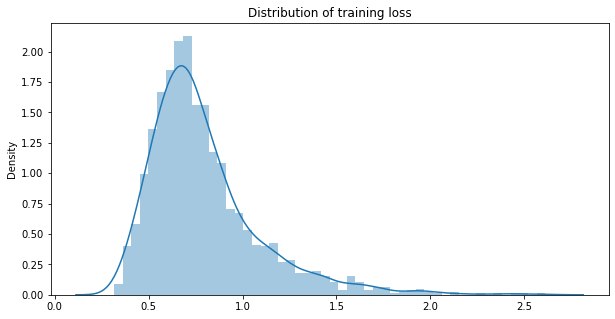

In [42]:
#MAE on train data
#prediction_train_LSTM = prediction_train(model)

train_pred = model.predict(X_train)
train_loss = (np.mean(np.abs(train_pred - X_train), axis=1))
avg_loss = train_loss.mean()
print ('Training_loss:', avg_loss);print()
plt.figure(figsize = (10,5))
sns.distplot(train_loss, bins=50, kde=True);
plt.title('Distribution of training loss')
plt.savefig('distribution.png')
plt.show()

In [43]:
####


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#MAE on test data
y_pred = model.predict(X_test)
print('Predict shape:', y_pred.shape); print();
mae = np.mean(np.abs(y_pred - X_test), axis=1)

Predict shape: (415, 12, 1)



In [44]:


# reshaping prediction
pred = y_pred.reshape((y_pred.shape[0] * y_pred.shape[1]), y_pred.shape[2])
print('Prediction:', pred.shape); print();
print('Test data shape:', X_test.shape); print();

Prediction: (4980, 1)

Test data shape: (415, 12, 1)



In [45]:
# reshaping test data
X_test = X_test.reshape((X_test.shape[0] * X_test.shape[1]), X_test.shape[2])
print('Test data:', X_test.shape); print();

#riscalare inverso
#X_test_inv = scaler.inverse(X_test)

# error computation
errors = X_test - pred
print('Error:', errors.shape); print();

# RMSE on test data
RMSE = math.sqrt(mean_squared_error(X_test, pred))
print('Test RMSE: %.3f' % RMSE);

#Test_accuracy = r2_score(X_test, pred)
#print('Test R2: %.3f' % Test_accuracy);

Test data: (4980, 1)

Error: (4980, 1)

Test RMSE: 1.255


Scores: (4980,)
Cutoff value: 4482
Threshold value= 1.5766131173987563


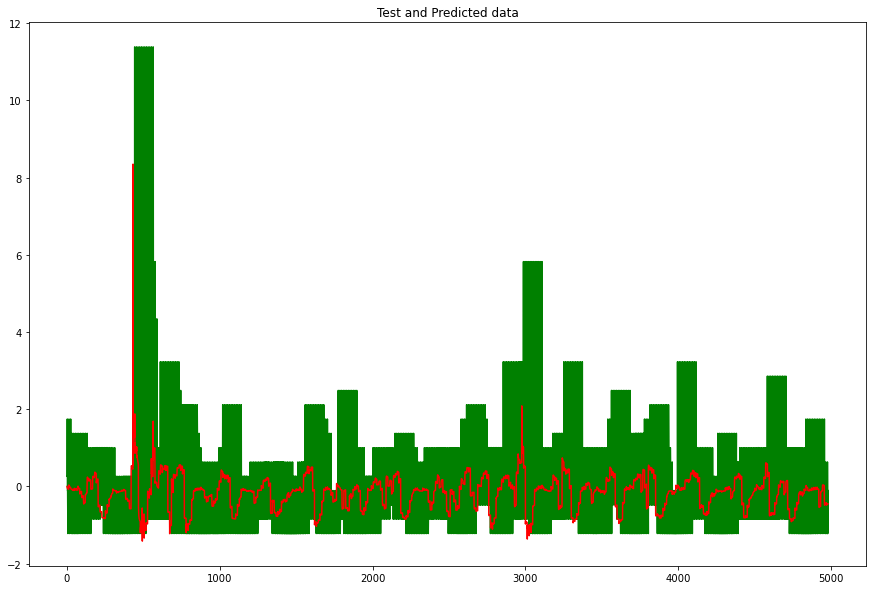

In [308]:
####
dist = np.linalg.norm(X_test-pred,axis=1);
scores = dist.copy();
print ('Scores:',scores.shape);
scores.sort();
cut_off = int(0.90*len(scores));#0.85
print ('Cutoff value:', cut_off);
threshold = scores[cut_off];
print ('Threshold value=', threshold)


plt.figure(figsize = (15,10))
plt.plot(X_test, color = 'green')
plt.plot(pred, color = 'red')
plt.title('Test and Predicted data')
plt.savefig('test_pred.png')
plt.show()

In [309]:
import matplotlib.dates as mdates

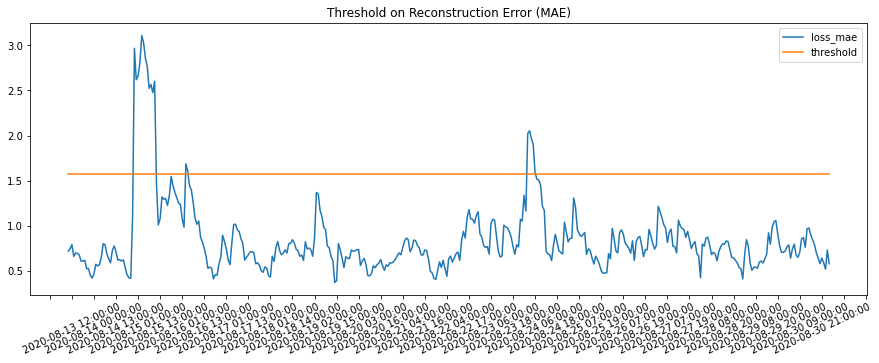

                         loss  threshold  anomaly   inverse_neg
date                                                           
2020-08-14 23:00:00  2.968240   1.576613     True  1.900000e+01
2020-08-15 00:00:00  2.619534   1.576613     True  1.500000e+01
2020-08-15 01:00:00  2.662406   1.576613     True  5.000000e+00
2020-08-15 02:00:00  2.811332   1.576613     True  4.000000e+00
2020-08-15 03:00:00  3.111398   1.576613     True  1.000000e+00
2020-08-15 04:00:00  3.029375   1.576613     True  1.000000e+00
2020-08-15 05:00:00  2.856540   1.576613     True  1.000000e+00
2020-08-15 06:00:00  2.769677   1.576613     True  1.000000e+00
2020-08-15 07:00:00  2.523307   1.576613     True  1.000000e+00
2020-08-15 08:00:00  2.567102   1.576613     True  3.000000e+00
2020-08-15 09:00:00  2.475753   1.576613     True  1.000000e+00
2020-08-15 10:00:00  2.601610   1.576613     True  1.000000e+00
2020-08-16 03:00:00  1.685146   1.576613     True -4.440892e-16
2020-08-16 04:00:00  1.604126   1.576613

In [310]:
####


score = pd.DataFrame(index=test[look_back:].index)
score['loss'] = mae
score['threshold'] = threshold
#score['threshold'] = 1.9
score['anomaly'] = score['loss'] > score['threshold']
score['neg'] = test[look_back:].neg

plt.figure(figsize = (15,5))
plt.plot(score.index, score.loss, label='loss_mae')
plt.plot(score.index, score.threshold, label='threshold')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=12))
plt.xticks(rotation=25)
plt.legend();
plt.title('Threshold on Reconstruction Error (MAE)')
plt.savefig('threshold.png')
plt.show()

anomalies = score[score.anomaly == True]
x = pd.DataFrame(anomalies.neg)
x = pd.DataFrame(scaler.inverse_transform(x))
x.index = anomalies.index
x.rename(columns = {0:'inverse_neg'}, inplace = True)
anomalies = anomalies.join(x, how = 'left')
anomalies = anomalies.drop(columns= ['neg'], axis=1)
print (anomalies.tail(42))

In [311]:
threshold

1.5766131173987563

In [312]:
test_inv = pd.DataFrame(scaler.inverse_transform(test[look_back:].neg))
test_inv.index = test[look_back:].neg.index
test_inv.rename(columns= {0:'neg'}, inplace = True)
print (test_inv)

                              neg
date                             
2020-08-13 10:00:00  4.000000e+00
2020-08-13 11:00:00 -4.440892e-16
2020-08-13 12:00:00  4.000000e+00
2020-08-13 13:00:00  4.000000e+00
2020-08-13 14:00:00  3.000000e+00
2020-08-13 15:00:00  4.000000e+00
2020-08-13 16:00:00  1.000000e+00
2020-08-13 17:00:00  3.000000e+00
2020-08-13 18:00:00  2.000000e+00
2020-08-13 19:00:00  3.000000e+00
2020-08-13 20:00:00  6.000000e+00
2020-08-13 21:00:00  3.000000e+00
2020-08-13 22:00:00  2.000000e+00
2020-08-13 23:00:00  6.000000e+00
2020-08-14 00:00:00  6.000000e+00
2020-08-14 01:00:00  2.000000e+00
2020-08-14 02:00:00  2.000000e+00
2020-08-14 03:00:00  2.000000e+00
2020-08-14 05:00:00 -4.440892e-16
2020-08-14 06:00:00 -4.440892e-16
2020-08-14 07:00:00  1.000000e+00
2020-08-14 08:00:00 -4.440892e-16
2020-08-14 09:00:00  2.000000e+00
2020-08-14 10:00:00 -4.440892e-16
2020-08-14 11:00:00  4.000000e+00
2020-08-14 12:00:00  2.000000e+00
2020-08-14 13:00:00  2.000000e+00
2020-08-14 14:

/Users/robertamaisano/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



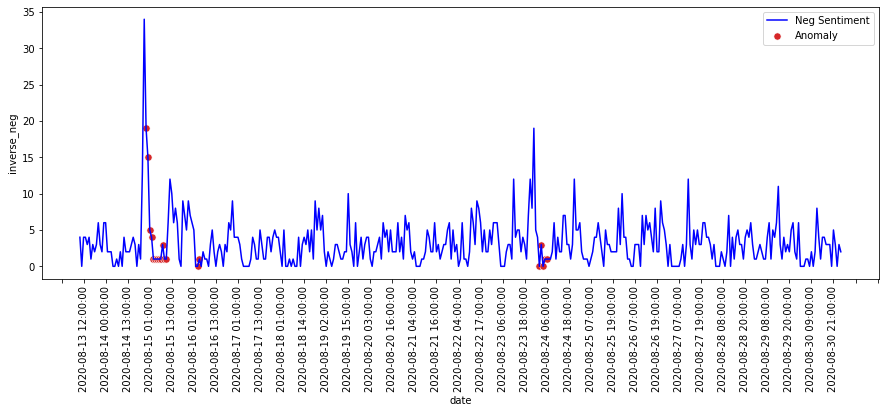

In [313]:
plt.figure(figsize = (15,5))
plt.plot(test_inv.index,test_inv.neg, color ='blue', label= 'Neg Sentiment');
sns.scatterplot(anomalies.index, anomalies.inverse_neg, color=sns.color_palette()[3], s=52, label='Anomaly')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=12))
plt.xticks(rotation=90)
plt.legend(loc='best');
plt.savefig('anomalies.png')
plt.show()

In [314]:
import plotly.express as px
import plotly.graph_objects as go

In [315]:
fig = px.line(test_inv, x=test_inv.index, y=test_inv.neg, title="Anomaly Detection Aug 2020")
fig.update_xaxes(dtick="0",
                rangeslider_visible=True)
fig.add_trace(go.Scatter(x=test_inv.index, y=test_inv.neg,
                    mode='lines',
                    name='Neg'))
#fig.add_scatter(anomalies.index, anomalies.inverse_pos, color=sns.color_palette()[3], s=52, label='Anomaly')
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies.inverse_neg,
                    mode='markers',
                    name='Anomaly'))
fig.update_traces(line=dict(width=1))
fig.show()

In [241]:
x

,inverse_neg
date,
2020-08-14 23:00:00,1.900000e+01
2020-08-15 00:00:00,1.500000e+01
2020-08-15 01:00:00,5.000000e+00
2020-08-15 02:00:00,4.000000e+00
2020-08-15 03:00:00,1.000000e+00
2020-08-15 04:00:00,1.000000e+00
2020-08-15 05:00:00,1.000000e+00
2020-08-15 06:00:00,1.000000e+00
2020-08-15 07:00:00,1.000000e+00


In [242]:

x.index

Index(['2020-08-14 23:00:00', '2020-08-15 00:00:00', '2020-08-15 01:00:00',
       '2020-08-15 02:00:00', '2020-08-15 03:00:00', '2020-08-15 04:00:00',
       '2020-08-15 05:00:00', '2020-08-15 06:00:00', '2020-08-15 07:00:00',
       '2020-08-15 08:00:00', '2020-08-15 09:00:00', '2020-08-15 10:00:00',
       '2020-08-16 03:00:00', '2020-08-16 04:00:00', '2020-08-24 02:00:00',
       '2020-08-24 03:00:00', '2020-08-24 04:00:00', '2020-08-24 05:00:00',
       '2020-08-24 06:00:00'],
      dtype='object', name='date')

In [243]:
x['anomalies'] = -1

In [244]:
dataset

,pos,neg,DBSCAN_labels
date,,,
2020-06-01 02:00:00,5,1,0
2020-06-01 03:00:00,13,4,1
2020-06-01 04:00:00,5,0,2
2020-06-01 05:00:00,0,1,0
2020-06-01 06:00:00,3,1,0
2020-06-01 07:00:00,14,3,3
2020-06-01 08:00:00,17,3,3
2020-06-01 09:00:00,27,6,4
2020-06-01 10:00:00,16,5,5


In [245]:
#Seleziono la parte di test set per poi confrontare le anomalie

test_size_after = 0.20
print("Test set size:",test_size_after)

test_after = dataset.iloc[train_size:len(dataset), :]
print ("Test dataset:",test_after.shape)

Test set size: 0.2
Test dataset: (427, 3)


In [246]:
test_after

,pos,neg,DBSCAN_labels
date,,,
2020-08-12 21:00:00,11,4,1
2020-08-12 22:00:00,24,4,1
2020-08-12 23:00:00,24,8,8
2020-08-13 00:00:00,13,3,3
2020-08-13 01:00:00,10,3,3
2020-08-13 02:00:00,8,1,0
2020-08-13 03:00:00,3,0,2
2020-08-13 04:00:00,0,2,7
2020-08-13 06:00:00,0,1,0


#### Copia delle anomalie dal vettore x delle anomalie join con test set

In [247]:
extracted_col = x['anomalies']
print("column to added from first dataframe to second:")
display(extracted_col)
  
test_after = test_after.join(extracted_col)
print("Second dataframe after adding column from first dataframe:")
display(test_after)

column to added from first dataframe to second:


date
2020-08-14 23:00:00   -1
2020-08-15 00:00:00   -1
2020-08-15 01:00:00   -1
2020-08-15 02:00:00   -1
2020-08-15 03:00:00   -1
2020-08-15 04:00:00   -1
2020-08-15 05:00:00   -1
2020-08-15 06:00:00   -1
2020-08-15 07:00:00   -1
2020-08-15 08:00:00   -1
2020-08-15 09:00:00   -1
2020-08-15 10:00:00   -1
2020-08-16 03:00:00   -1
2020-08-16 04:00:00   -1
2020-08-24 02:00:00   -1
2020-08-24 03:00:00   -1
2020-08-24 04:00:00   -1
2020-08-24 05:00:00   -1
2020-08-24 06:00:00   -1
Name: anomalies, dtype: int64

Second dataframe after adding column from first dataframe:


,pos,neg,DBSCAN_labels,anomalies
date,,,,
2020-08-12 21:00:00,11,4,1,NaN
2020-08-12 22:00:00,24,4,1,NaN
2020-08-12 23:00:00,24,8,8,NaN
2020-08-13 00:00:00,13,3,3,NaN
2020-08-13 01:00:00,10,3,3,NaN
2020-08-13 02:00:00,8,1,0,NaN
2020-08-13 03:00:00,3,0,2,NaN
2020-08-13 04:00:00,0,2,7,NaN
2020-08-13 06:00:00,0,1,0,NaN


###### Sostituzione '0' dei valori NaN

In [248]:
test_after['anomalies'] = test_after['anomalies'].fillna(0)

In [249]:
test_after

,pos,neg,DBSCAN_labels,anomalies
date,,,,
2020-08-12 21:00:00,11,4,1,0.0
2020-08-12 22:00:00,24,4,1,0.0
2020-08-12 23:00:00,24,8,8,0.0
2020-08-13 00:00:00,13,3,3,0.0
2020-08-13 01:00:00,10,3,3,0.0
2020-08-13 02:00:00,8,1,0,0.0
2020-08-13 03:00:00,3,0,2,0.0
2020-08-13 04:00:00,0,2,7,0.0
2020-08-13 06:00:00,0,1,0,0.0


###### Saving dataset with anomalies

In [250]:
test_after.to_csv('sahel_jun_aug_2020_DBscan-cities_anomalies.csv')

In [251]:
#aggiungo colonna anomalie da dbscan
test_after['DBSCAN_anomalies']=test_after['DBSCAN_labels']

In [252]:
test_after

,pos,neg,DBSCAN_labels,anomalies,DBSCAN_anomalies
date,,,,,
2020-08-12 21:00:00,11,4,1,0.0,1
2020-08-12 22:00:00,24,4,1,0.0,1
2020-08-12 23:00:00,24,8,8,0.0,8
2020-08-13 00:00:00,13,3,3,0.0,3
2020-08-13 01:00:00,10,3,3,0.0,3
2020-08-13 02:00:00,8,1,0,0.0,0
2020-08-13 03:00:00,3,0,2,0.0,2
2020-08-13 04:00:00,0,2,7,0.0,7
2020-08-13 06:00:00,0,1,0,0.0,0


In [253]:
#sostituzione su dbscan 0 per non-anomalie , anomalie = -1
test_after['DBSCAN_anomalies'] = test_after.apply(lambda x: 0 if x['DBSCAN_labels'] != -1 else -1, axis = 1)


In [254]:
test_after["anomalies"]=test_after["anomalies"].astype(int)

In [255]:
test_after

,pos,neg,DBSCAN_labels,anomalies,DBSCAN_anomalies
date,,,,,
2020-08-12 21:00:00,11,4,1,0,0
2020-08-12 22:00:00,24,4,1,0,0
2020-08-12 23:00:00,24,8,8,0,0
2020-08-13 00:00:00,13,3,3,0,0
2020-08-13 01:00:00,10,3,3,0,0
2020-08-13 02:00:00,8,1,0,0,0
2020-08-13 03:00:00,3,0,2,0,0
2020-08-13 04:00:00,0,2,7,0,0
2020-08-13 06:00:00,0,1,0,0,0


In [256]:
import seaborn as sns

In [257]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    #sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
               # xticklabels = categories, yticklabels = categories)
    sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [258]:
test_after['anomalies']=pd.to_numeric(test_after['anomalies'], downcast='integer')

In [259]:
test_after['anomalies']

date
2020-08-12 21:00:00    0
2020-08-12 22:00:00    0
2020-08-12 23:00:00    0
2020-08-13 00:00:00    0
2020-08-13 01:00:00    0
2020-08-13 02:00:00    0
2020-08-13 03:00:00    0
2020-08-13 04:00:00    0
2020-08-13 06:00:00    0
2020-08-13 07:00:00    0
2020-08-13 08:00:00    0
2020-08-13 09:00:00    0
2020-08-13 10:00:00    0
2020-08-13 11:00:00    0
2020-08-13 12:00:00    0
2020-08-13 13:00:00    0
2020-08-13 14:00:00    0
2020-08-13 15:00:00    0
2020-08-13 16:00:00    0
2020-08-13 17:00:00    0
2020-08-13 18:00:00    0
2020-08-13 19:00:00    0
2020-08-13 20:00:00    0
2020-08-13 21:00:00    0
2020-08-13 22:00:00    0
2020-08-13 23:00:00    0
2020-08-14 00:00:00    0
2020-08-14 01:00:00    0
2020-08-14 02:00:00    0
2020-08-14 03:00:00    0
2020-08-14 05:00:00    0
2020-08-14 06:00:00    0
2020-08-14 07:00:00    0
2020-08-14 08:00:00    0
2020-08-14 09:00:00    0
2020-08-14 10:00:00    0
2020-08-14 11:00:00    0
2020-08-14 12:00:00    0
2020-08-14 13:00:00    0
2020-08-14 14:00:00 

In [260]:
df = test_after[['DBSCAN_anomalies','anomalies']]

In [261]:
df

,DBSCAN_anomalies,anomalies
date,,
2020-08-12 21:00:00,0,0
2020-08-12 22:00:00,0,0
2020-08-12 23:00:00,0,0
2020-08-13 00:00:00,0,0
2020-08-13 01:00:00,0,0
2020-08-13 02:00:00,0,0
2020-08-13 03:00:00,0,0
2020-08-13 04:00:00,0,0
2020-08-13 06:00:00,0,0


In [262]:
# replace -1 with 1
df["DBSCAN_anomalies"].replace({-1: 1}, inplace=True)
df["anomalies"].replace({-1: 1}, inplace=True)



/Users/robertamaisano/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
df

,DBSCAN_anomalies,anomalies
date,,
2020-08-12 21:00:00,0,0
2020-08-12 22:00:00,0,0
2020-08-12 23:00:00,0,0
2020-08-13 00:00:00,0,0
2020-08-13 01:00:00,0,0
2020-08-13 02:00:00,0,0
2020-08-13 03:00:00,0,0
2020-08-13 04:00:00,0,0
2020-08-13 06:00:00,0,0


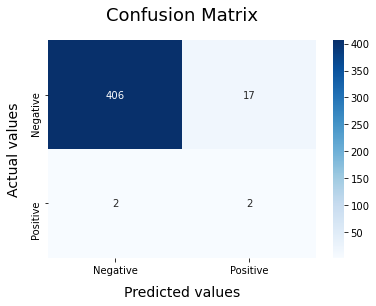

In [264]:
#ConfusionMatrix(df['y_pred'], df['y_test'])
ConfusionMatrix(df['anomalies'], df['DBSCAN_anomalies'])

In [265]:
# TP = 2, TN = 406, FP = 17, FN = 2

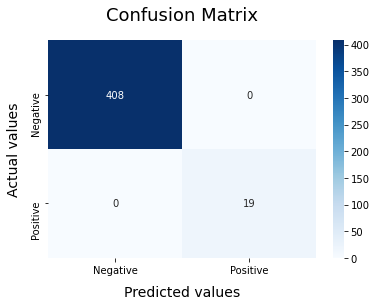

In [266]:
ConfusionMatrix(df['anomalies'], df['anomalies'])

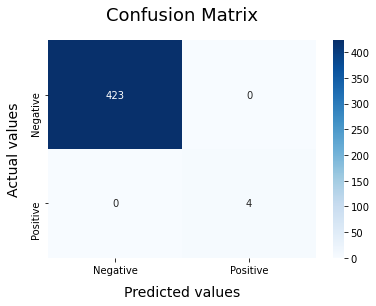

In [267]:
ConfusionMatrix(df['DBSCAN_anomalies'], df['DBSCAN_anomalies'])

In [268]:
df

,DBSCAN_anomalies,anomalies
date,,
2020-08-12 21:00:00,0,0
2020-08-12 22:00:00,0,0
2020-08-12 23:00:00,0,0
2020-08-13 00:00:00,0,0
2020-08-13 01:00:00,0,0
2020-08-13 02:00:00,0,0
2020-08-13 03:00:00,0,0
2020-08-13 04:00:00,0,0
2020-08-13 06:00:00,0,0


In [269]:
def applyParallelAnd(ts1,ts2):
    return (ts1 & ts2)


In [270]:
def applyParallelOrWithShift(ts,numShift,defaultValue=False):
    result=ts
    #result1=ts
    for i in range(1,numShift+1):
        result1 = ts.shift(i)
    result1.fillna(defaultValue, inplace = True)
    #result2 = 0
    if numShift != 0:
        result2 = ((result + result1))> 0
        result2.astype(int)
    return result2

In [271]:
def isPrecedingSignal(tpts,predts,index,lwsize,lwcont):
    startingindex = index+1
    endingindex = min((index+lwsize),len(predts))
    ok=0
    for i in range(startingindex,endingindex) :
        ok = ok or tpts[i]
    return ok

In [272]:
def isTrailingSignal(tpts,predts,index,trlwsize,trlwcont):
    startingindex = max((index-trlwsize),0)
    endingindex= index-1
    ok2 = 0
    for i in range(startingindex,endingindex+1) :
                    ok2 = ok2 or tpts[i]
    return ok2

In [273]:
def RangeBasedConfusionMatrix(realTs,predTs,lwSize,trlwSize,lwCont,trlwCont):
    tn=fp=fn=tp=0;
#calculate the number of anomalies in the actual time series */
    numEvents = sum(realTs);#num casi anomalie reali = 4
    if lwCont :
        tpTs = applyParallelAnd(realTs,predTs) #and parallelo tra le 2 serie
    else:
        adjTs = applyParallelOrWithShift(predTs,lwSize)
        tpTs = applyParallelAnd(realTs,adjTs)
    tp = sum(tpTs)#num casi anomalie predetti corrispondenti ai reali = 2
    fn = numEvents-tp #4-2=2
    for i in range(len(predTs)) :
        if (predTs[i] == True) & (realTs[i]==False):
            isPreS = isPrecedingSignal(realTs,predTs,i,lwSize,lwCont)#roby
            isTrlS = isTrailingSignal(realTs,predTs,i,trlwSize,trlwCont)#roby
            if (isPreS == False) & (isTrlS == False) :
                fp = fp + 1         
    tn = len(realTs)-fp-fn-tp
    return [tn,fp,fn,tp]

In [333]:
RangeBasedConfusionMatrix(df['DBSCAN_anomalies'], df['anomalies'], 10,32,0,0)

[423, 0, 2, 2]

In [337]:
#Precision = TruePositives / (TruePositives + FalsePositives)
TN = 423
FP = 0
FN = 2
TP = 2
Precision= TP/(TP+FP)
Precision

1.0

In [338]:
#Recall = TruePositives / (TruePositives + FalseNegatives)
Recall = TP/(TP+FN)
Recall

0.5

In [339]:
F_Measure = (2 * Precision * Recall) / (Precision + Recall)
F_Measure

0.6666666666666666

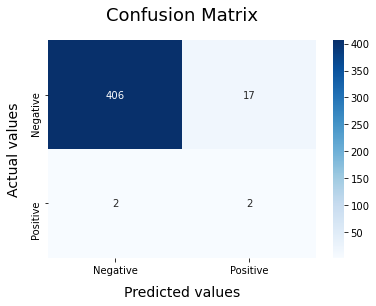

In [316]:
#ConfusionMatrix(df['y_pred'], df['y_test'])
ConfusionMatrix(df['anomalies'], df['DBSCAN_anomalies'])

In [317]:
#Precision = TruePositives / (TruePositives + FalsePositives)
TN_m = 406
FP_m = 17
FN_m = 2
TP_m = 2
Precision_m= TP_m/(TP_m+FP_m)
Precision_m

0.10526315789473684

In [318]:
#Recall = TruePositives / (TruePositives + FalseNegatives)
Recall_m = TP_m/(TP_m+FN_m)
Recall_m

0.5

In [319]:
F_Measure_m = (2 * Precision_m * Recall_m) / (Precision_m + Recall_m)
F_Measure_m

0.17391304347826086

In [320]:
from sklearn.metrics import f1_score

In [321]:
# calculate score
score = f1_score(df['DBSCAN_anomalies'], df['anomalies'], average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.174
